# Project Bragg Reflector : Script Lumerical

A  Bragg reflector is a reflector used in waveguides, such as optical fibers. It's formed from multiple layers of alternating materials with different refractive index, or by periodic variation of some characteristic of a dielectric waveguide, resulting in periodic variation in the effective refractive index in the guide. 

![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/f/fd/Bragg.gif?1645867489862 "chess")

# Reflectivity

The reflectivity R, for intensity is approximately given by
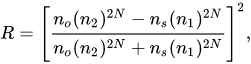

where no,n_1,n_2 and ns, are the respective refractive indices of the originating medium, the two alternating materials, and the terminating medium (i.e. backing or substrate); and N is the number of repeated pairs of low/high refractive index material.

The frequency bandwidth Δf{0} of the photonic stopband can be calculated by
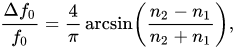


Calculated reflectivity of a schematic DBR structure
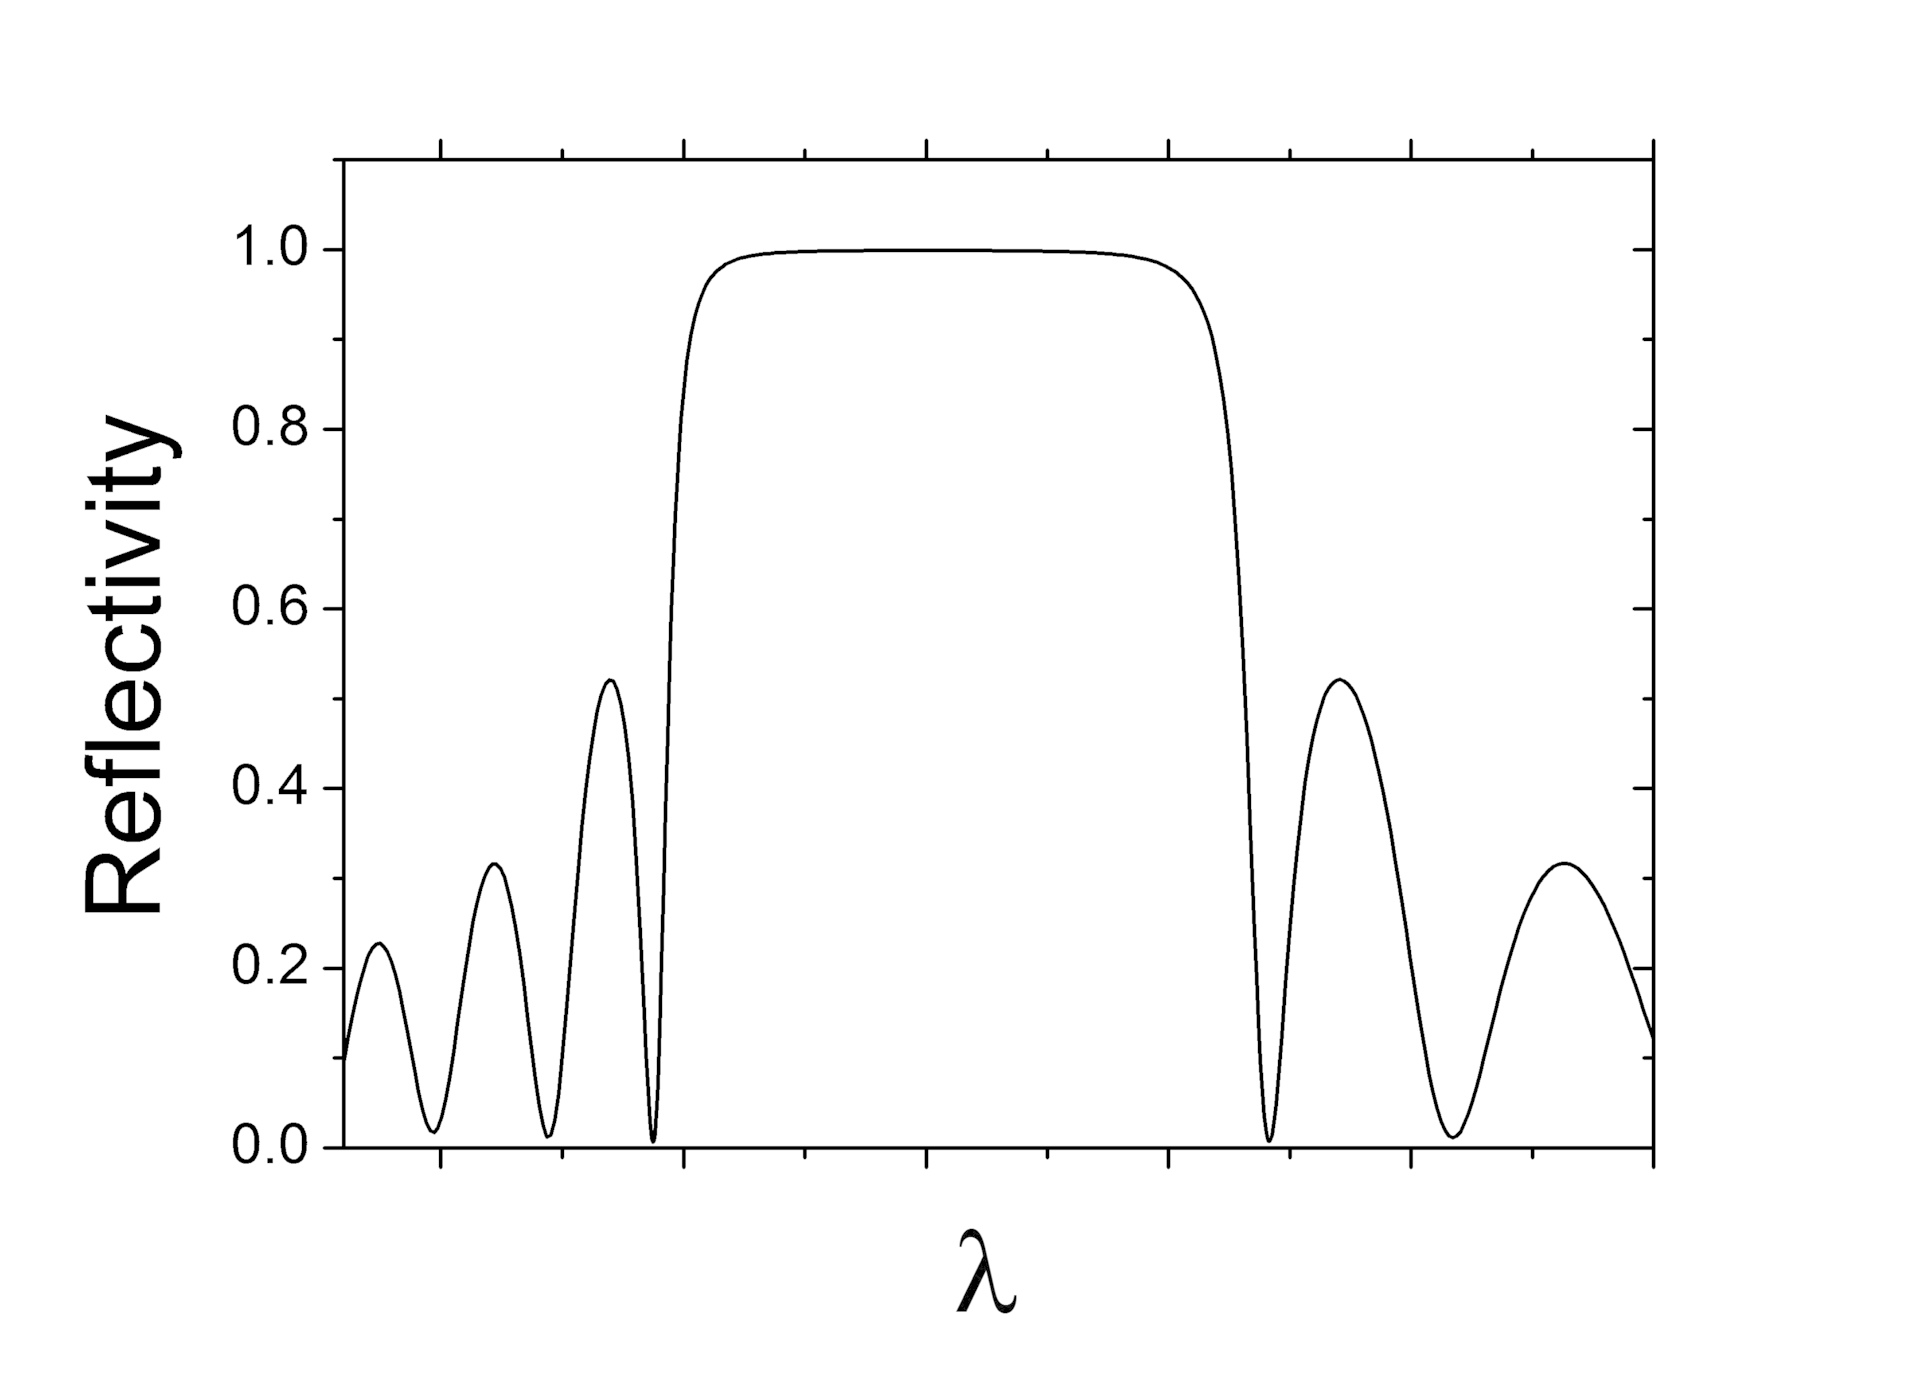


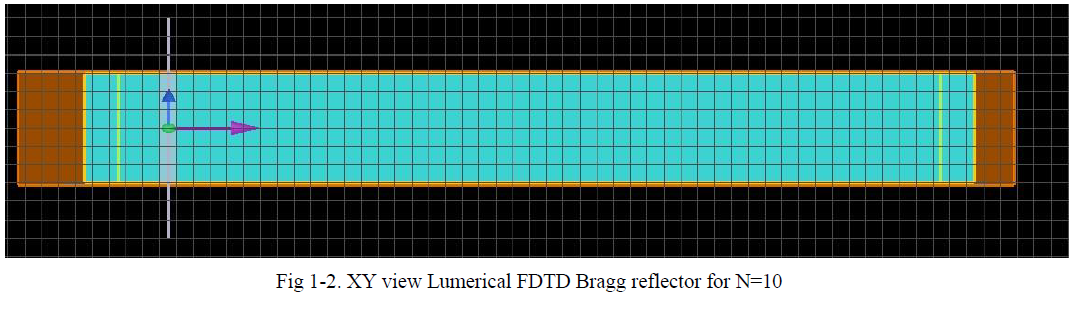

## Implementation

The following Bragg reflector consists 𝑛1, 𝑛2 has the following dimensions
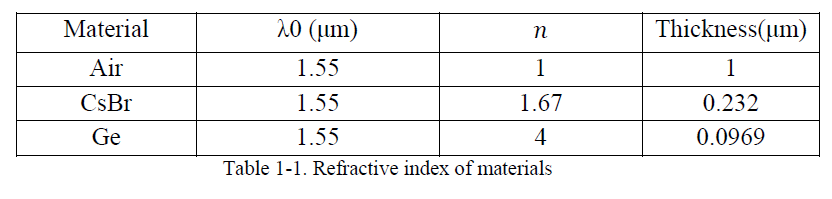

Thickness of layers 𝑛1, 𝑛2 has been calculated using the following equation:
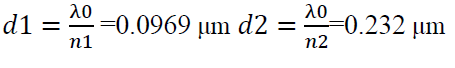

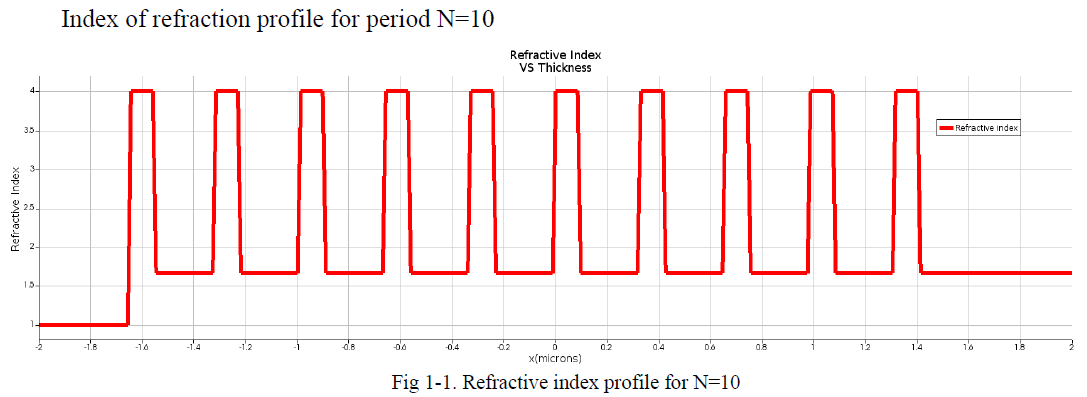

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imp

#By Halil Cuma

In [2]:
lumAPI = imp.load_source("lumAPI","C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py")

In [3]:
fdtd = lumAPI.FDTD()

In [7]:
# Xsize = 240e-9
Ysize = 0.6e-6
Zsize = 0.36e-6


Xcenter=0
Ycenter=0
Zcenter=0

n_start=1e-6 #size of first layer
n_end=1e-6   #size of final layer

n_start_index=1
n_end_index=1

n1=4
n2=1.67

m=1 #Odd multiples 1,3,5...
WL0=1550e-9

d1=m*((WL0/(4*n1)))
d2=m*((WL0/(4*n2)))

N=10

fdtdSpan=(N*(d1+d2))+(n_end)+(n_start) 

WaveL_Start = 0.5e-6
WaveL_Stop  = 2.5e-6


In [8]:
fdtd.addfdtd()
fdtd.set("x",Xcenter)
fdtd.set("x span",fdtdSpan)


fdtd.set("y",Xcenter)
fdtd.set("y span",Ysize)

fdtd.set("z",Zcenter)

fdtd.set("y min bc", "Periodic")
fdtd.set("dimension", "2D")


fdtd.addrect()
fdtd.set("name","n_start")
fdtd.set("index",n_start_index)


fdtd.set("x",-((fdtdSpan)-n_start)/2)
fdtd.set("x span",n_start)


fdtd.set("y",0)
fdtd.set("y span",Ysize)

fdtd.set("z",0)
fdtd.set("z span",Zsize)


fdtd.addrect()
fdtd.set("name","n_end")
fdtd.set("index",n_end_index)

fdtd.set("x",((fdtdSpan)-n_start)/2)
fdtd.set("x span",n_end)


fdtd.set("y",0)
fdtd.set("y span",Ysize)

fdtd.set("z",0)
fdtd.set("z span",Zsize)


fdtd.addplane()
fdtd.set("name","Plane Wave")

fdtd.set("injection axis","x")
fdtd.set("direction","forward")

fdtd.set("x",-((fdtdSpan)-n_start)/2)

fdtd.set("y",Ycenter)
fdtd.set("y span",Ysize)

fdtd.set("z",Zcenter)
fdtd.set("z span",Zsize)

fdtd.set("wavelength start",WaveL_Start)
fdtd.set("wavelength stop",WaveL_Stop)


fdtd.addpower()
fdtd.set("name","R_mointor")
fdtd.set("monitor type",3)

fdtd.set("x",(-((((fdtdSpan)-n_start)/2))-0.3e-6))

fdtd.set("y",Ycenter)
fdtd.set("y span",Ysize)

fdtd.set("z",Zcenter)


fdtd.addpower()
fdtd.set("name","T_mointor")
fdtd.set("monitor type",3)

fdtd.set("x",(((((fdtdSpan)-n_start)/2))+0.3e-6))

fdtd.set("y",Ycenter)
fdtd.set("y span",Ysize)

fdtd.set("z",Zcenter)


fdtd.addmovie() 
fdtd.set("name","Moive")

fdtd.set("x",Xcenter)
fdtd.set("x span",fdtdSpan)

fdtd.set("y",Ycenter)
fdtd.set("y span",Ysize)


fdtd.setglobalmonitor("frequency points", 1001)
fdtd.setglobalmonitor("use wavelength spacing", 1)

1.0

In [9]:
fdtd.select("group");
fdtd.delete();

xSpanN1=0
xSpanN2=0

xN1i=0
xN2i=0

# xSpanN1=0.232e-6 
# xSpanN2=0.09688e-6 

xN1i = -(fdtdSpan/2-1e-6-(d1/2))
xN2i = ((d1/2)+(d2/2))+xN1i


for _ in range(N):

    fdtd.addrect()
    fdtd.set("name","n1")
    fdtd.set("index",n1)

    fdtd.set("x",xN1i)
    fdtd.set("x span",d1)

    fdtd.set("y",0)
    fdtd.set("y span",0.6e-6)

    fdtd.set("z",0)
    fdtd.set("z span", 0.36e-6)
    fdtd.addtogroup("group")

    fdtd.addrect()
    fdtd.set("name","n2")
    fdtd.set("index",n2)

    fdtd.set("x",xN2i)
    fdtd.set("x span",d2)

    fdtd.set("y",0)
    fdtd.set("y span",0.6e-6)

    fdtd.set("z",0)
    fdtd.set("z span", 0.36e-6)
    fdtd.addtogroup("group")
    
    xN1i = ((d1/2)+(d2/2))+xN2i
    xSpanN1=0.232e-6 
    xSpanN2=0.09688e-6 
    xN2i = ((d1/2)+(d2/2))+xN1i 


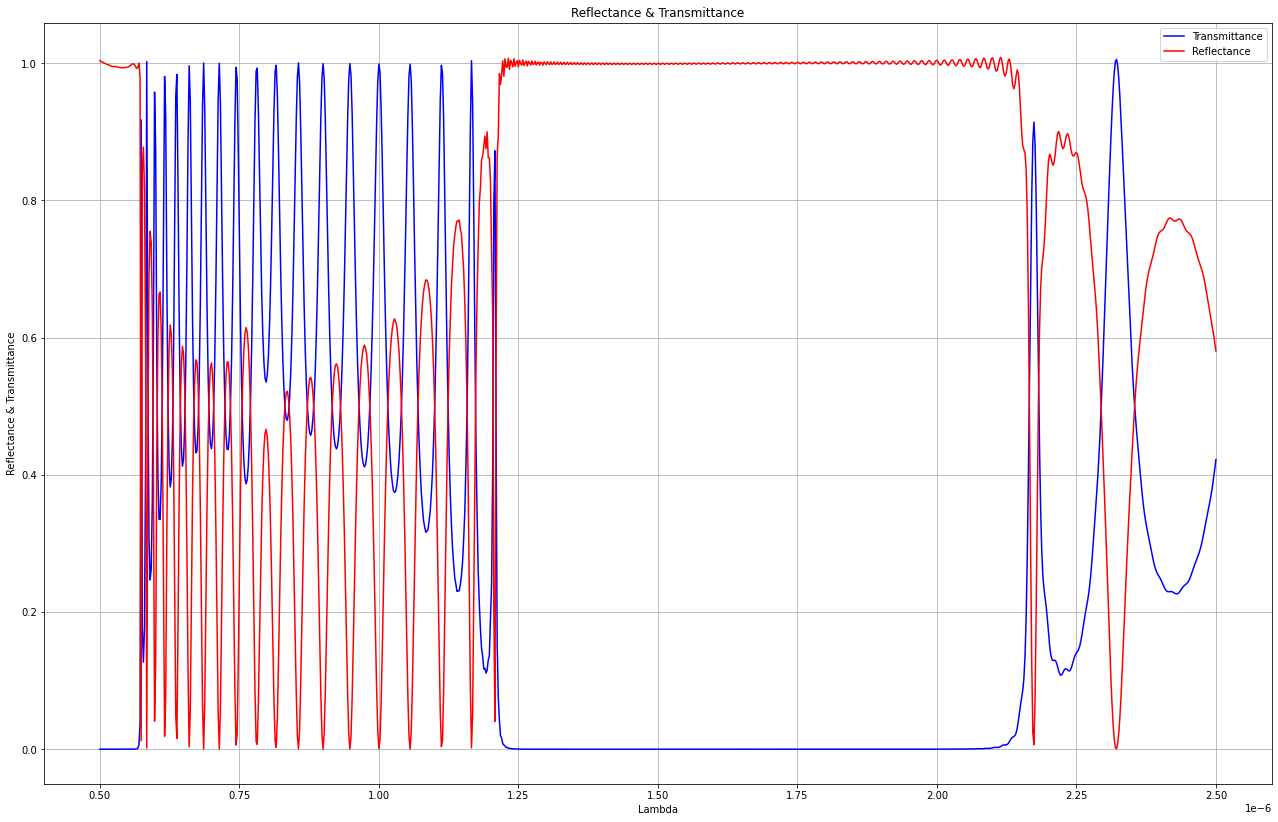

In [10]:
fdtd.save("CAD_Report1_task1.fsp")
fdtd.run()

T = fdtd.getresult("T_mointor","T")

Lam = T["lambda"]
Lam = Lam[:,0]

Trans = T["T"]

R = fdtd.getresult("R_mointor","T")
Refl = R["T"]

plt.figure(figsize = (22,14))

plt.plot(Lam,Trans, "-b", label="Transmittance")
plt.plot(Lam,abs(Refl), "-r", label="Reflectance")

plt.legend(['Transmittance','Reflectance'])

plt.title('Reflectance & Transmittance')
plt.xlabel('Lambda')

plt.ylabel('Reflectance & Transmittance')
plt.grid(True)

plt.show()
fdtd.switchtolayout()